In [4]:
using JLD2, FileIO, Plots

@load "exact_save.jld2"

┌ Info: Recompiling stale cache file /DATA/home/ppinsm/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


1-element Array{Symbol,1}:
 :save

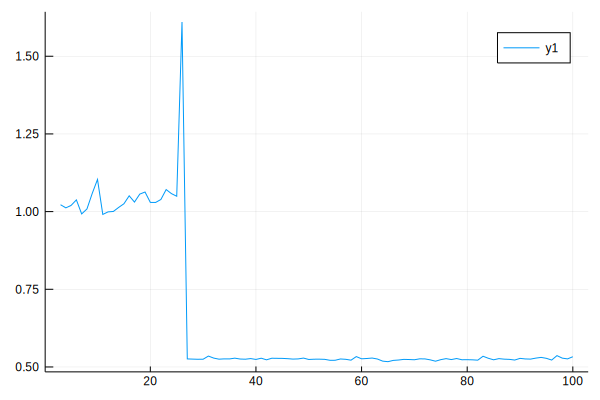

In [5]:
plot(3:100,save[3:100])

In [68]:
include("functions-Copy1.jl")

misocp (generic function with 1 method)

In [46]:
function f(x)
    theta = [0.05884, 4.298, 21.8]
    c1 = x*theta[3]*exp(-theta[1]*x)
    c2 = -x*theta[3]*exp(-theta[2]*x) 
    c3 = exp(-theta[2]*x)-exp(-theta[1]*x)
    return [c1; c2; c3]
end

ex1 = example(3,[0,30],f)

example(3, [0, 30], f)

In [53]:
function f(x)
    theta = [.2; .2; .2]
    c = theta[1]*exp(theta[2]*x) + (1-theta[1])*exp(-theta[3]*x)
    f = [1; (exp(theta[2]*x) - exp(-theta[3]*x))/c; theta[1]*x*exp(theta[2]*x)/c; -(1-theta[1])*x*exp(-theta[3]*x)/c]
    return f
end

ex1 = example(4,[0,10],f)

example(4, [0, 10], f)

In [64]:
function f(x)
    theta = [3,-5,0]
    c = exp(theta[1]+theta[2]*(x-theta[3])^2)
    f = [1,(x-theta[3])^2,2*theta[2]*(theta[3]-x) ]
    return sqrt(c)/(1+c)*f
end

ex1 = example(3, [-1,1], f)

example(3, [-1, 1], f)

In [69]:
res = misocp(ex1,300,0)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3945            
  Cones                  : 906             
  Scalar variables       : 5744            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 906
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective 

([2.5617446214213514e-6 -1.0; 3.086225641199941e-6 -0.9933333333333333; … ; 3.0862256412025492e-6 0.9933333333333333; 2.561744621421005e-6 1.0], 0.2724872598619592)

In [70]:
vec1 = res[1][:,1]

301-element Array{Float64,1}:
 2.5617446214213514e-6 
 3.086225641199941e-6  
 3.7956474601957653e-6 
 4.786176457305046e-6  
 6.225226585865082e-6  
 8.425682288435492e-6  
 1.2029684343726841e-5 
 1.8537239921714246e-5 
 3.218748748090451e-5  
 6.932164647238177e-5  
 0.00025012805217746945
 0.014620456819233373  
 0.28125860014301846   
 ⋮                     
 0.014620456822265442  
 0.00025012805217695814
 6.932164647159267e-5  
 3.218748748083838e-5  
 1.8537239921747205e-5 
 1.2029684343738385e-5 
 8.425682288436433e-6  
 6.225226585863118e-6  
 4.786176457306775e-6  
 3.7956474601980138e-6 
 3.0862256412025492e-6 
 2.561744621421005e-6  

In [71]:
norm(vec1)

0.45117903285704164

In [72]:
vec1[vec1 .> 0.01]

8-element Array{Float64,1}:
 0.014620456819233373
 0.28125860014301846 
 0.13480845974235012 
 0.06546670544843387 
 0.06546670537589899 
 0.13480845981425693 
 0.28125860013997533 
 0.014620456822265442

In [65]:
res = misocp(ex1,300,0)

Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 3945            
  Cones                  : 906             
  Scalar variables       : 5744            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 906
Eliminator terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 2                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.01    
Problem
  Name                   :                 
  Objective 

([2.5617446214213514e-6 -1.0; 3.086225641199941e-6 -0.9933333333333333; … ; 3.0862256412025492e-6 0.9933333333333333; 2.561744621421005e-6 1.0], 0.2724872598619592)

In [66]:
vec2 = res[1][:,1]

301-element Array{Float64,1}:
 2.5617446214213514e-6 
 3.086225641199941e-6  
 3.7956474601957653e-6 
 4.786176457305046e-6  
 6.225226585865082e-6  
 8.425682288435492e-6  
 1.2029684343726841e-5 
 1.8537239921714246e-5 
 3.218748748090451e-5  
 6.932164647238177e-5  
 0.00025012805217746945
 0.014620456819233373  
 0.28125860014301846   
 ⋮                     
 0.014620456822265442  
 0.00025012805217695814
 6.932164647159267e-5  
 3.218748748083838e-5  
 1.8537239921747205e-5 
 1.2029684343738385e-5 
 8.425682288436433e-6  
 6.225226585863118e-6  
 4.786176457306775e-6  
 3.7956474601980138e-6 
 3.0862256412025492e-6 
 2.561744621421005e-6  

In [67]:
vec2[vec2 .> 0.01]

8-element Array{Float64,1}:
 0.014620456819233373
 0.28125860014301846 
 0.13480845974235012 
 0.06546670544843387 
 0.06546670537589899 
 0.13480845981425693 
 0.28125860013997533 
 0.014620456822265442